# 1. 실습: 의사 결정 트리 예

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from subprocess import check_call
from sklearn.tree import export_graphviz
from subprocess import check_call

In [31]:
df = pd.read_csv("./dt_example.csv")


In [32]:
def format_features(df):
    features = df.columns.values
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [33]:
y=df["Type"]
X = df.drop(['Type'], axis = 1)
X = format_features(X)

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)


In [35]:
clf

DecisionTreeClassifier(criterion='entropy')

In [36]:
export_graphviz(
    clf, # 학습한 모형
    out_file = './out.dot', # .dot 파일 저장 위치
    feature_names = X.columns.values,# 사용한 변수 이름
    class_names = ["Cat", "Dog"], # 예측할 타겟클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)

In [37]:
# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','out.dot','-o','OutputFile.png'])

0

# 2. 실습: 의사결정 트리와 랜덤 포레스트

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


In [40]:
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=11)

In [41]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.73      0.73      0.73        11
           2       0.80      0.80      0.80        15

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.84      0.84      0.84        38



In [42]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.73      0.73      0.73        11
           2       0.80      0.80      0.80        15

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.84      0.84      0.84        38



In [43]:
clf = RandomForestClassifier(n_estimators=10, random_state=11)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=11)

In [44]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.91      0.87        11
           2       0.93      0.87      0.90        15

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.92      0.92      0.92        38



# 3. 실습: AdaBoost 예제

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt


In [46]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


In [47]:
clf = AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.91      0.87        11
           2       0.93      0.87      0.90        15

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.92      0.92      0.92        38



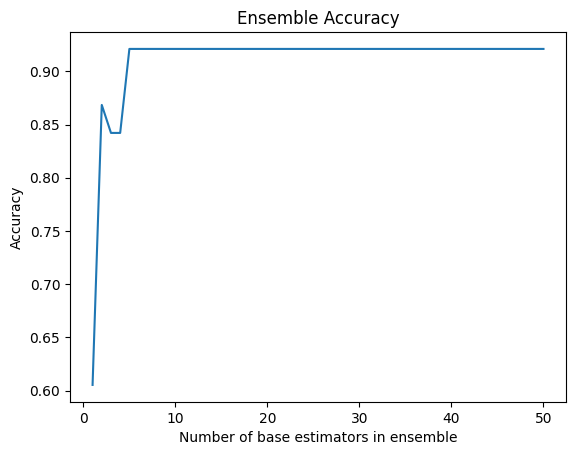

In [48]:
accuracies=[]
accuracies.append(clf.score(X_test, y_test))
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.plot(range(1, 51), [accuracy for accuracy in clf.staged_score(X_test, y_test)])
plt.show()

# 4. 실습: 스태킹 예제

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone, BaseEstimator, TransformerMixin, ClassifierMixin


In [50]:
class StackingClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()
    def fit(self, X, y):
        for clf in self.classifiers: 
            clf.fit(X, y)
        self.meta_classifier.fit(self._get_meta_features(X), y) 
        return self
    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1)
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))
    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))


In [51]:
X, y = make_classification(
n_samples=1000, n_features=50, n_informative=30, n_clusters_per_class=3, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic regression accuracy: %s' % lr.score(X_test, y_test))

Logistic regression accuracy: 0.816


In [53]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN accuracy: %s' % knn_clf.score(X_test, y_test))

KNN accuracy: 0.836


In [54]:
base_classifiers = [lr, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print('Stacking classifier accuracy: %s' % stacking_clf.score(X_test, y_test))

Stacking classifier accuracy: 0.856


# 5. 실습: 엘보 기법 예제

In [55]:
import numpy as np 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


In [59]:
c1x = np.random.uniform(0.5, 1.5, (1, 10)) 
c1y = np.random.uniform(0.5, 1.5, (1, 10)) 
c2x = np.random.uniform(3.5, 4.5, (1, 10)) 
c2y = np.random.uniform(3.5, 4.5, (1, 10)) 
x = np.hstack((c1x, c2x)) 
y = np.hstack((c1y, c2y)) 
X = np.vstack((x, y)).T

In [60]:
K = range(1, 10) 
meanDispersions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meanDispersions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

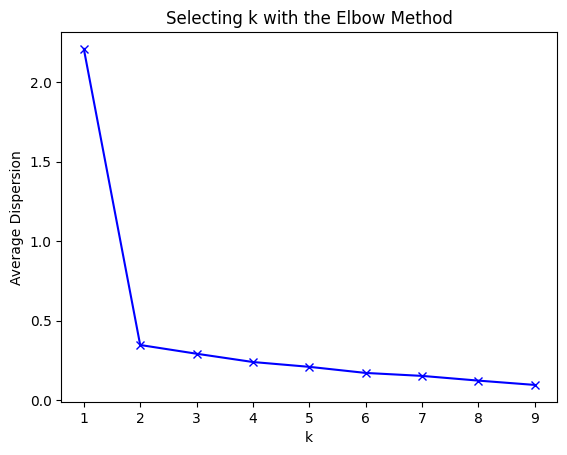

In [61]:
plt.plot(K, meanDispersions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average Dispersion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

# 6. 실습: 실루엣 계수 계산 예

In [62]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

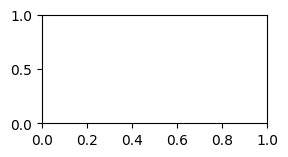

In [63]:
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

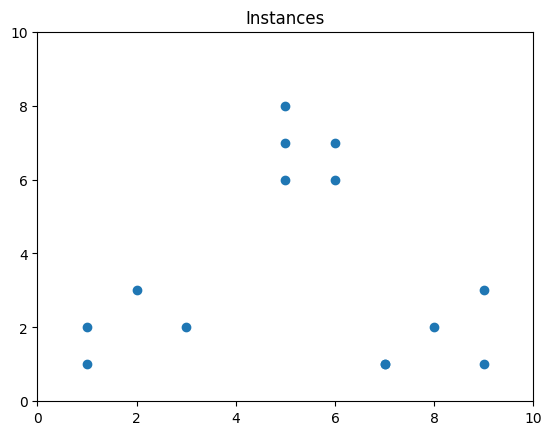

In [64]:

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1


C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

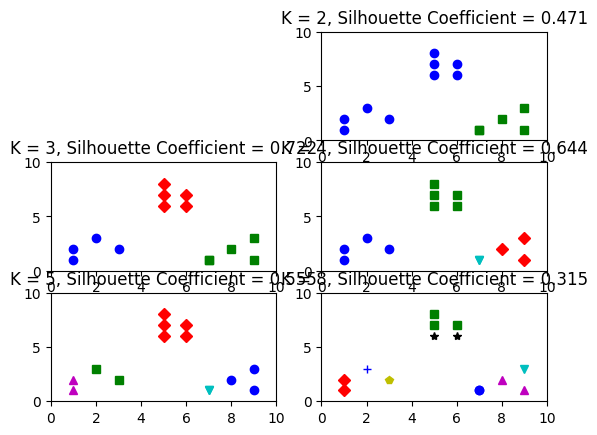

In [65]:
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('K = %s, Silhouette Coefficient = %.03f' % (
        t, metrics.silhouette_score(X, kmeans_model.labels_, 
    metric='euclidean')))
plt.show()
